<a href="https://colab.research.google.com/github/Thipwadee/Project2/blob/main/2_TSV_Clf_Models_ExplainedV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pandas.api.types import  CategoricalDtype

# machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.inspection import PartialDependenceDisplay


In [2]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [40]:
df_encoded = pd.read_excel('/content/Cleaned_Thermal_Data.xlsx', sheet_name='sheet_2', usecols=lambda x: 'Unnamed' not in x,)
df_encoded

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,อุณหภูมิ,ความชื้น,กระแสลม,...,Clo,Met,พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง,พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม,พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร,seasons_summer,seasons_winter,เพศ_ชาย,เพศ_หญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [41]:
df_encoded.rename(columns = {'เพศ_หญิง':'เพศหญิง','เพศ_ชาย' : 'เพศชาย', 'seasons_summer' : 'summer', 'seasons_winter' : 'winter', 'พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้' : 'ใต้ร่มไม้', 'พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง' : 'กลางแจ้ง',
                       'พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม' : 'มีหลังคาคลุม', 'พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร' : 'ภายใต้อาคาร', 'อุณหภูมิ' : 'ความรู้สึกถึงอุณหภูมิ', 'ความชื้น' : 'ความรู้สึกถึงความชื้น',
                       'กระแสลม' : 'ความรู้สึกถึงกระแสลม','ความแรงของแสงแดด' : 'ความรู้สึกถึงแสงแดด','เหงื่อบริเวณผิวหนัง' : 'ความรู้สึกถึงเหงื่อ', 'ความร้อน' : 'ความต้องการอุณหภูมิ','ความชื้น.1' : 'ความต้องการความชื้น', 'กระแสลม.1': 'ความต้องการกระแสลม', 'แสงแดด' : 'ความต้องการแสงแดด',
                       'เหงื่อบริเวณผิวหนัง.1': 'ความต้องการเหงื่อ'}, inplace = True)
df_encoded

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงอุณหภูมิ,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสลม,...,Clo,Met,ใต้ร่มไม้,กลางแจ้ง,มีหลังคาคลุม,ภายใต้อาคาร,summer,winter,เพศชาย,เพศหญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [42]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     193 non-null    int64  
 1   BMI                     193 non-null    float64
 2   Temp                    193 non-null    float64
 3   RH                      193 non-null    float64
 4   V                       193 non-null    float64
 5   Thermal_acceptance      193 non-null    object 
 6   Thermal_sensation_Vote  193 non-null    int64  
 7   ความรู้สึกถึงอุณหภูมิ   193 non-null    int64  
 8   ความรู้สึกถึงความชื้น   193 non-null    int64  
 9   ความรู้สึกถึงกระแสลม    193 non-null    int64  
 10  ความรู้สึกถึงแสงแดด     193 non-null    int64  
 11  ความรู้สึกถึงเหงื่อ     193 non-null    int64  
 12  ความต้องการอุณหภูมิ     193 non-null    int64  
 13  ความต้องการความชื้น     193 non-null    int64  
 14  ความต้องการกระแสลม      193 non-null    in

In [43]:
df = {'Accept':0, 'Unaccept':1}
df_encoded = df_encoded.copy()
for i in range(5,6):
  df_encoded.iloc[:,i] = df_encoded.iloc[:,i].map(df)
df_encoded

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงอุณหภูมิ,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสลม,...,Clo,Met,ใต้ร่มไม้,กลางแจ้ง,มีหลังคาคลุม,ภายใต้อาคาร,summer,winter,เพศชาย,เพศหญิง
0,27,17.156262,30.5,42.9,0.13,0,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,0,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,0,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,0,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,0,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,0,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,1,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,0,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,0,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [44]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     193 non-null    int64  
 1   BMI                     193 non-null    float64
 2   Temp                    193 non-null    float64
 3   RH                      193 non-null    float64
 4   V                       193 non-null    float64
 5   Thermal_acceptance      193 non-null    int64  
 6   Thermal_sensation_Vote  193 non-null    int64  
 7   ความรู้สึกถึงอุณหภูมิ   193 non-null    int64  
 8   ความรู้สึกถึงความชื้น   193 non-null    int64  
 9   ความรู้สึกถึงกระแสลม    193 non-null    int64  
 10  ความรู้สึกถึงแสงแดด     193 non-null    int64  
 11  ความรู้สึกถึงเหงื่อ     193 non-null    int64  
 12  ความต้องการอุณหภูมิ     193 non-null    int64  
 13  ความต้องการความชื้น     193 non-null    int64  
 14  ความต้องการกระแสลม      193 non-null    in

#Spitt Data

In [45]:
fo_mapping = {
    -2 :-2,
    -1 :-1,
    0 : 0,
    1 : 1,
    2 :2,
    3 :3,
}

df_encoded['TSV2'] = df_encoded['Thermal_sensation_Vote'].map(fo_mapping)

In [46]:
df_encoded[df_encoded['Thermal_sensation_Vote']== -2]

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงอุณหภูมิ,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสลม,...,Met,ใต้ร่มไม้,กลางแจ้ง,มีหลังคาคลุม,ภายใต้อาคาร,summer,winter,เพศชาย,เพศหญิง,TSV2
28,20,19.146722,27.7,50.4,0.210,0,-2,0,1,6,...,1.2,0,1,0,0,0,1,0,1,-2
36,20,19.146722,27.5,50.0,0.075,0,-2,1,0,1,...,1.2,0,0,1,0,0,1,0,1,-2
43,20,19.146722,27.7,46.6,0.265,0,-2,0,1,3,...,1.2,0,0,1,0,0,1,0,1,-2
45,20,19.146722,27.2,50.4,1.765,0,-2,1,0,5,...,1.2,0,0,1,0,0,1,0,1,-2


In [47]:
df= df_encoded.drop([28,36,43,45])
df

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงอุณหภูมิ,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสลม,...,Met,ใต้ร่มไม้,กลางแจ้ง,มีหลังคาคลุม,ภายใต้อาคาร,summer,winter,เพศชาย,เพศหญิง,TSV2
0,27,17.156262,30.5,42.9,0.13,0,0,2,1,2,...,1.2,0,0,1,0,0,1,1,0,0
1,36,23.183673,30.5,42.9,0.13,0,-1,3,0,5,...,1.2,0,0,1,0,0,1,1,0,-1
2,25,38.019565,30.5,42.9,0.13,0,-1,2,0,4,...,1.2,0,0,1,0,0,1,0,1,-1
3,29,27.548209,30.5,42.9,0.13,0,-1,3,3,4,...,1.2,0,0,1,0,0,1,1,0,-1
4,28,33.744173,30.5,42.9,0.13,0,-1,2,1,4,...,1.2,0,0,1,0,0,1,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,0,0,3,2,4,...,1.2,0,0,0,1,1,0,1,0,0
189,23,18.591037,35.6,46.5,0.40,1,0,3,1,4,...,1.2,0,0,0,1,1,0,0,1,0
190,27,16.456006,35.6,46.5,0.40,0,1,4,4,4,...,1.2,0,0,0,1,1,0,1,0,1
191,57,23.255019,35.6,46.5,0.40,0,1,3,1,5,...,1.2,0,0,0,1,1,0,1,0,1


In [48]:
fo_mapping = {
    -1 :-1,
    0 : 0,
    1 : 1,
    2 :2,
    3 :3,
}

df['TSV2'] = df['Thermal_sensation_Vote'].map(fo_mapping)

In [49]:
df['TSV2'][df['TSV2']==-1] = 1
df['TSV2'][df['TSV2']==0] = 1
df['TSV2'][df['TSV2']==1] = 1


df['TSV2'][df['TSV2']== 2] = 2
df['TSV2'][df['TSV2']==3] = 2


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [50]:
fo_mapping = {
    1 :0,
    2 :1,
}

df['TSV2'] = df['TSV2'].map(fo_mapping)
df

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงอุณหภูมิ,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสลม,...,Met,ใต้ร่มไม้,กลางแจ้ง,มีหลังคาคลุม,ภายใต้อาคาร,summer,winter,เพศชาย,เพศหญิง,TSV2
0,27,17.156262,30.5,42.9,0.13,0,0,2,1,2,...,1.2,0,0,1,0,0,1,1,0,0
1,36,23.183673,30.5,42.9,0.13,0,-1,3,0,5,...,1.2,0,0,1,0,0,1,1,0,0
2,25,38.019565,30.5,42.9,0.13,0,-1,2,0,4,...,1.2,0,0,1,0,0,1,0,1,0
3,29,27.548209,30.5,42.9,0.13,0,-1,3,3,4,...,1.2,0,0,1,0,0,1,1,0,0
4,28,33.744173,30.5,42.9,0.13,0,-1,2,1,4,...,1.2,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,0,0,3,2,4,...,1.2,0,0,0,1,1,0,1,0,0
189,23,18.591037,35.6,46.5,0.40,1,0,3,1,4,...,1.2,0,0,0,1,1,0,0,1,0
190,27,16.456006,35.6,46.5,0.40,0,1,4,4,4,...,1.2,0,0,0,1,1,0,1,0,0
191,57,23.255019,35.6,46.5,0.40,0,1,3,1,5,...,1.2,0,0,0,1,1,0,1,0,0


In [51]:
df.TSV2.value_counts()


0    151
1     38
Name: TSV2, dtype: int64

#Spitt Data

In [52]:
X=df.drop(['Thermal_acceptance','TSV2','Thermal_sensation_Vote'], axis =1)
y3 = df['TSV2']

In [53]:
import numpy as np
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# ตั้งค่าพารามิเตอร์สำหรับ K-Fold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# วนลูปผ่าน K-Fold
for train_index, test_index in kf.split(X):
    # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y3_train, y3_test = y3.iloc[train_index], y3.iloc[test_index]

    # ทำมาตรฐานข้อมูล
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)


    # ใช้ SMOTE สำหรับการทำ resampling ข้อมูลชุดฝึก
    smote = SMOTE(k_neighbors=2,random_state=42)
    X_train_res, y3_train_res = smote.fit_resample(X_train_scaled, y3_train)

    print(f"Training set size after resampling: {X_train_res.shape}")
    print(f"Test set size: {X_test_scaled.shape}")

Training set size after resampling: (234, 26)
Test set size: (38, 26)
Training set size after resampling: (240, 26)
Test set size: (38, 26)
Training set size after resampling: (236, 26)
Test set size: (38, 26)
Training set size after resampling: (248, 26)
Test set size: (38, 26)
Training set size after resampling: (250, 26)
Test set size: (37, 26)


#Logistics regression 2-TSV

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'],
    'logisticregression__max_iter': [100, 200, 500, 1000],
    'logisticregression__solver': ['lbfgs', 'saga']
}

pipe = Pipeline(steps=[('scale', StandardScaler()), ('logisticregression', LogisticRegression())])
grid = GridSearchCV(pipe, param_grid, cv=5, refit=True, verbose=0)
grid.fit(X_train_res, y3_train_res)

print("Best parameters :", grid.best_params_)
print("Best accuracy :", grid.best_score_)

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the

Best parameters : {'logisticregression__C': 1, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Best accuracy : 0.884


The max_iter was reached which means the coef_ did not converge


Best parameters : {'logisticregression__C': 100, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Best accuracy : 0.9720000000000001

In [54]:
Log_reg = LogisticRegression(C= 100, max_iter=100, penalty= 'l2', solver= 'lbfgs', random_state=42)

# Train the model
result = Log_reg.fit(X_train_res, y3_train_res)

# Make predictions on the test set
y3_pred = Log_reg.predict(X_test_scaled)
print(confusion_matrix(y3_test,y3_pred))
print(classification_report(y3_test,y3_pred))

[[23  3]
 [ 2  9]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.75      0.82      0.78        11

    accuracy                           0.86        37
   macro avg       0.83      0.85      0.84        37
weighted avg       0.87      0.86      0.87        37



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [18]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.0 MB/s eta 0:00:00


In [55]:
class_names = [0,1]

In [56]:
#masker = shap.maskers.Independent(data = X_train_res)
# SHAP Interpreter
#shapExplainer = shap.LinearExplainer(result,masker=masker)
#shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
#shapExplainer.__dict__

# Summary features contribute in model
#shap.summary_plot(shapValues, X_train_res.values, plot_type = 'bar', class_names= class_names, feature_names = X_train_res.columns)


In [57]:
#shap.summary_plot(shapValues, X_train_res)

In [58]:
#base_features = ['Temp','ความต้องการอุณหภูมิ','ความรู้สึกถึงเหงื่อ']
#n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
#fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

#for i, bf in enumerate(base_features):
#    PartialDependenceDisplay.from_estimator(
#        result,
#        X_train_res,
#        features=[bf],
#        feature_names=base_features,
#        ax=axs[i]  # ใช้ axis ที่ i
#    )
#    axs[i].set_title("Partial Dependency Plot")

#plt.tight_layout()
#plt.show()

#Random forest 2-TSV

In [ ]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7],'criterion':['gini', 'entropy', 'log_loss']}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
rf_grid.fit(X_train_res, y3_train_res)
print("best_params :",rf_grid.best_params_)
print("accuracy :",rf_grid.best_score_)

best_params : {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_split': 5, 'n_estimators': 50}
accuracy : 1.0


In [70]:
rf = RandomForestClassifier(criterion= 'gini', max_depth= 3, max_features= 6, min_samples_split= 5, n_estimators= 50, random_state=42)
result = rf.fit(X_train_res, y3_train_res)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)
print(confusion_matrix(y3_test,y_pred))
print(classification_report(y3_test,y_pred))
print(dict(zip(X.columns,rf.feature_importances_.round(2))))

[[25  1]
 [ 0 11]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.92      1.00      0.96        11

    accuracy                           0.97        37
   macro avg       0.96      0.98      0.97        37
weighted avg       0.98      0.97      0.97        37

{'Age': 0.01, 'BMI': 0.01, 'Temp': 0.11, 'RH': 0.02, 'V': 0.01, 'ความรู้สึกถึงอุณหภูมิ': 0.34, 'ความรู้สึกถึงความชื้น': 0.01, 'ความรู้สึกถึงกระแสลม': 0.0, 'ความรู้สึกถึงแสงแดด': 0.11, 'ความรู้สึกถึงเหงื่อ': 0.18, 'ความต้องการอุณหภูมิ': 0.02, 'ความต้องการความชื้น': 0.01, 'ความต้องการกระแสลม': 0.01, 'ความต้องการแสงแดด': 0.02, 'ความต้องการเหงื่อ': 0.08, 'TMRT': 0.04, 'Clo': 0.0, 'Met': 0.0, 'ใต้ร่มไม้': 0.0, 'กลางแจ้ง': 0.0, 'มีหลังคาคลุม': 0.0, 'ภายใต้อาคาร': 0.0, 'summer': 0.0, 'winter': 0.0, 'เพศชาย': 0.0, 'เพศหญิง': 0.0}


In [ ]:
#from sklearn import tree

#for i in range(len(rf.estimators_)):
#        plt.figure(figsize = (15,10))
#        tree.plot_tree(rf.estimators_[0] , filled =True)
#        plt.show()

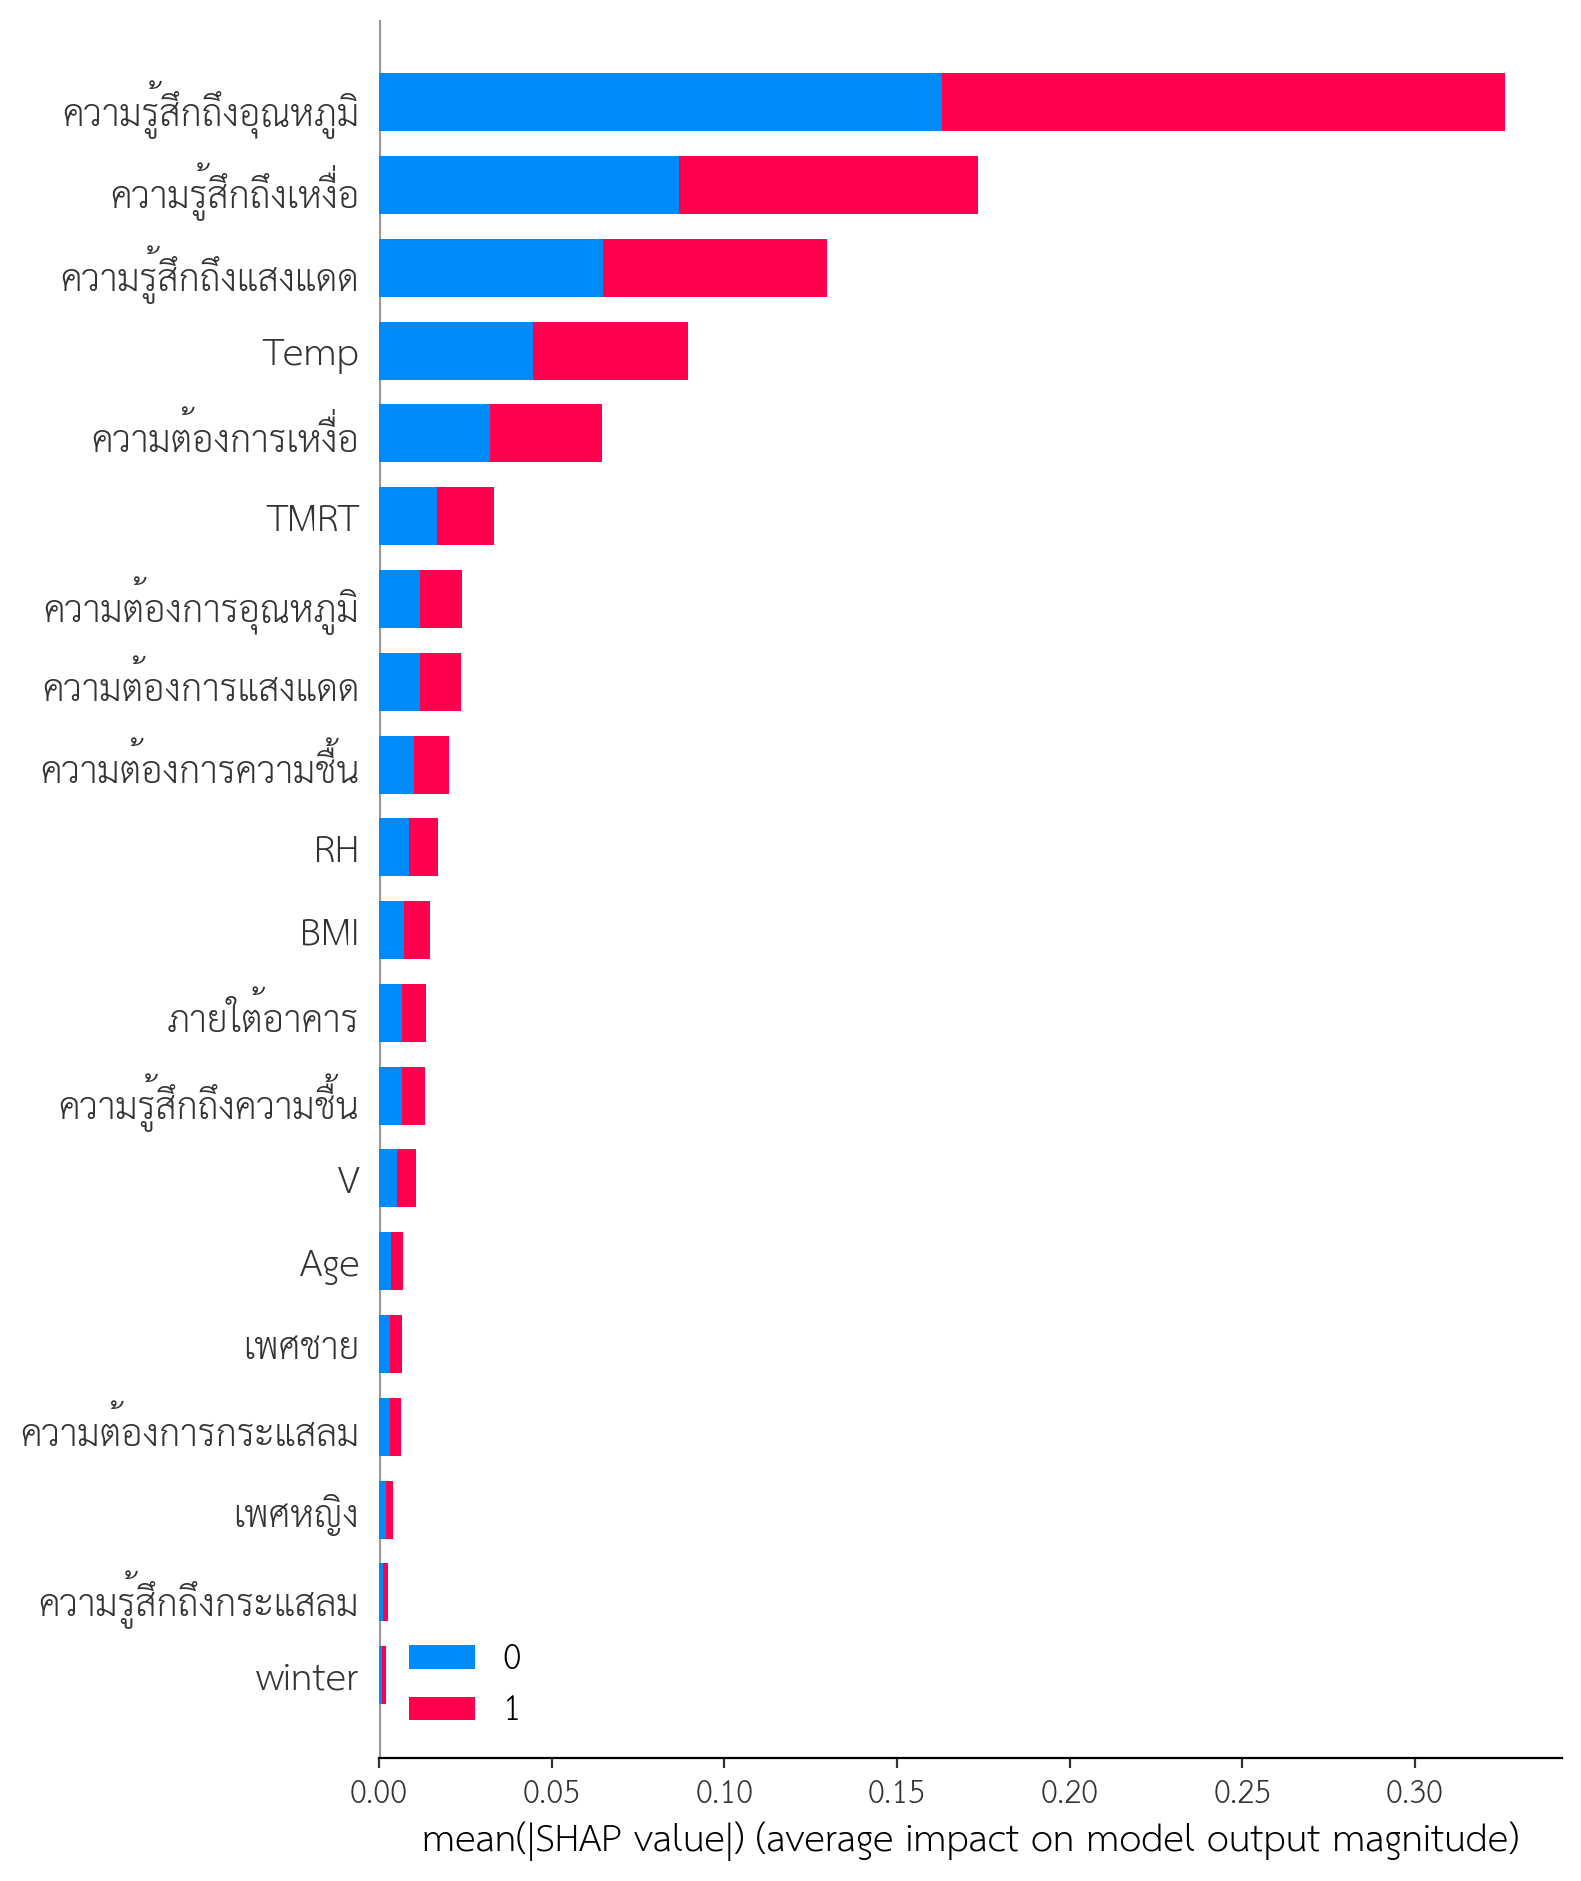

In [60]:
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(result)
shap_values = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shap_values, X_train_res.values, plot_type = 'bar', class_names= class_names, feature_names = X_train_res.columns)


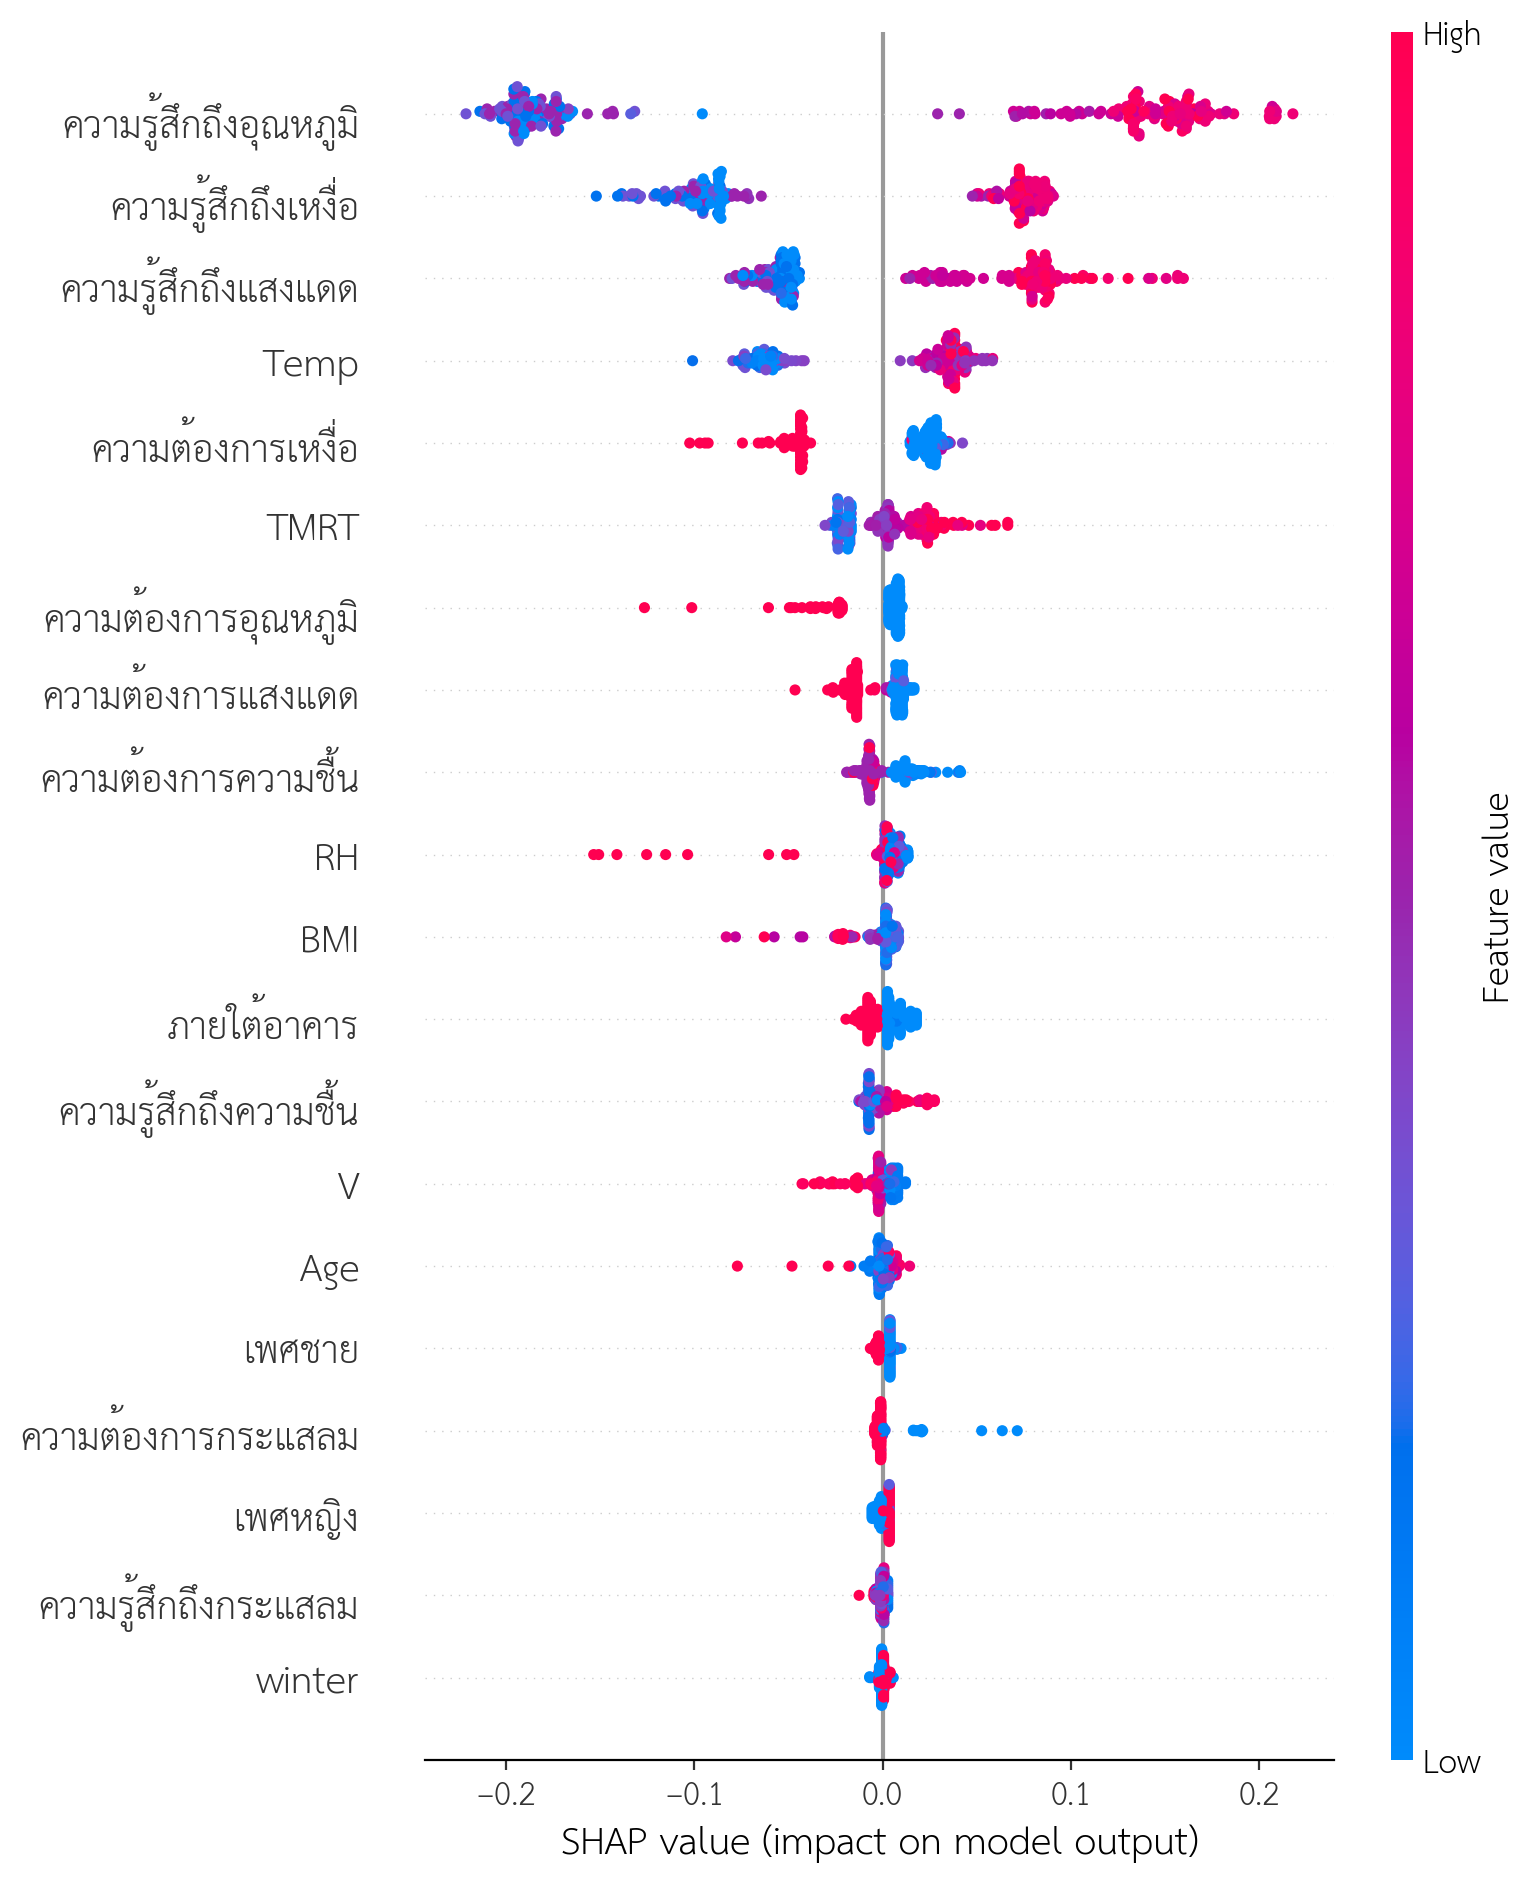

In [61]:
shap.summary_plot(shap_values[1], X_train_res.values, feature_names = X_train_res.columns)

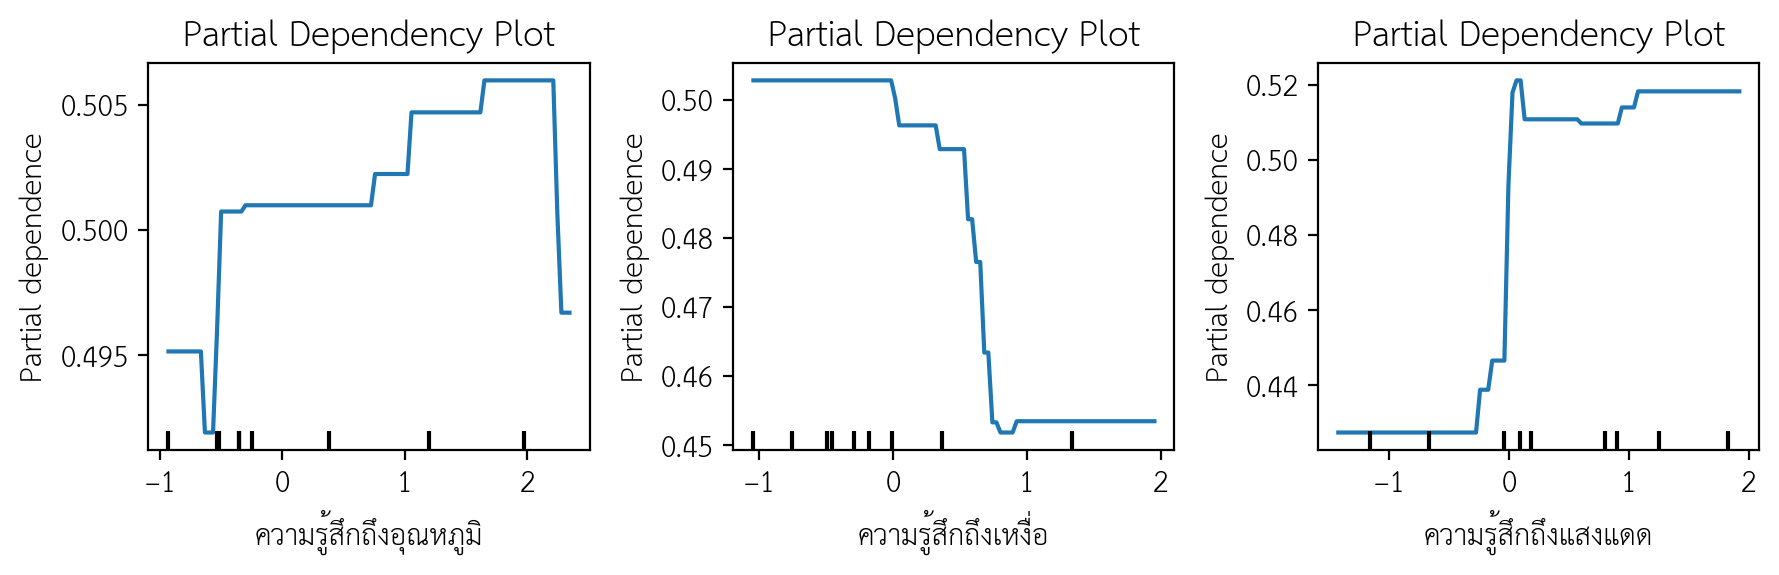

In [33]:
base_features = ['ความรู้สึกถึงอุณหภูมิ','ความรู้สึกถึงเหงื่อ','ความรู้สึกถึงแสงแดด']
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        result,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

#XGBoost 2-TSV

In [ ]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3],
              'n_estimators':[5,10,20,100],'subsample': [0.3, 0.5, 1]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train_res, y3_train_res)
print("best_params :",xgb_grid.best_params_)
print("accuracy :",xgb_grid.best_score_)

best_params : {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 5, 'subsample': 0.3}
accuracy : 1.0


In [62]:
xgb = XGBClassifier(learning_rate= 0.05, max_depth= 5, min_child_weight= 1, n_estimators= 5,subsample=0.3, random_state=42)

result = xgb.fit(X_train_res, y3_train_res)

# Make predictions on the test set
y_pred = xgb.predict(X_test_scaled)
print(confusion_matrix(y3_test,y_pred))
print(classification_report(y3_test,y_pred))

[[22  4]
 [ 0 11]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        26
           1       0.73      1.00      0.85        11

    accuracy                           0.89        37
   macro avg       0.87      0.92      0.88        37
weighted avg       0.92      0.89      0.90        37



In [63]:
# SHAP Interpreter
#shapExplainer = shap.TreeExplainer(result)
#shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
#shapExplainer.__dict__

# Summary features contribute in model
#shap.summary_plot(shapValues, X_train_res.values, plot_type = 'bar', class_names= class_names, feature_names = X_train_res.columns)

In [64]:
#shap.summary_plot(shapValues, X_train_res)

In [66]:
#base_features = ['ความรู้สึกถึงอุณหภูมิ','ความรู้สึกถึงเหงื่อ','BMI']
#n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
#fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

#for i, bf in enumerate(base_features):
#    PartialDependenceDisplay.from_estimator(
#        result,
#        X_train_res,
#        features=[bf],
#        feature_names=base_features,
#        ax=axs[i]  # ใช้ axis ที่ i
#    )
#    axs[i].set_title("Partial Dependency Plot")

#plt.tight_layout()
#plt.show()

#SVC 2-TSV

In [ ]:
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=0)
svm_grid.fit(X_train_res, y3_train_res)
print("best_params :",svm_grid.best_params_)
print("accuracy :",svm_grid.best_score_)

best_params : {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}
accuracy : 0.992


In [67]:
svm = SVC(C= 100,gamma= 0.01, kernel='sigmoid', random_state=42)

result = svm.fit(X_train_res, y3_train_res)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)
print(confusion_matrix(y3_test,y_pred))
print(classification_report(y3_test,y_pred))

[[23  3]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.77      0.91      0.83        11

    accuracy                           0.89        37
   macro avg       0.86      0.90      0.88        37
weighted avg       0.90      0.89      0.89        37



In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#plt.figure(figsize=(10, 8))
# Plotting our two-features-space
#sns.scatterplot(x=X_train_res.iloc[:, 2],
#                y=X_train_res.iloc[:, 3],
#                hue=y_train_res,
#                s=8);
# Constructing a hyperplane using a formula.
#w = svm.coef_[0]           # w consists of 2 elements
#b = svm.intercept_[0]      # b consists of 1 element
#x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
#y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
#plt.plot(x_points, y_points, c='r');

#KNN 2 TSV

In [ ]:
param_grid = dict(
    n_neighbors=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    weights=['uniform', 'distance'],
    algorithm=['auto', 'kd_tree']
)
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, refit=True, verbose=0)
knn_grid.fit(X_train_res, y3_train_res)
print("best_params :",knn_grid.best_params_)
print("accuracy :",knn_grid.best_score_)

best_params : {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}
accuracy : 0.8879999999999999


In [68]:
knn = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 2, weights= 'uniform')

result = knn.fit(X_train_res, y3_train_res)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)
print(confusion_matrix(y3_test,y_pred))
print(classification_report(y3_test,y_pred))

[[21  5]
 [ 3  8]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.62      0.73      0.67        11

    accuracy                           0.78        37
   macro avg       0.75      0.77      0.75        37
weighted avg       0.80      0.78      0.79        37



In [ ]:
shapExplainer = shap.KernelExplainer(result,X_train_res)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res.values, plot_type = 'bar', class_names= class_names, feature_names = X_train_res.columns)
#.summary_plot(shap_values, X.values, plot_type="bar", class_names= class_names, feature_names = X.columns)

Provided model function fails when applied to the provided data set.


TypeError: 'KNeighborsClassifier' object is not callable

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

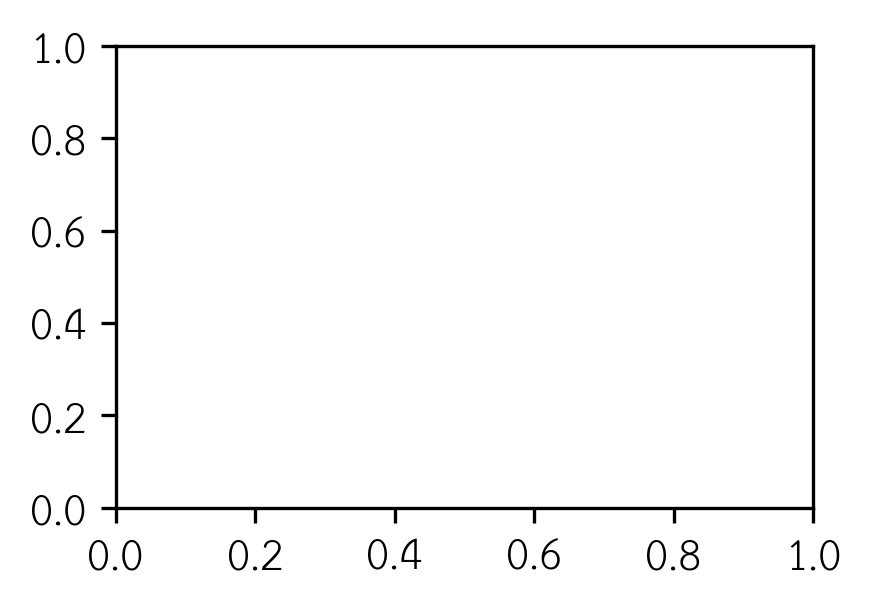

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2), dpi=150)
pd.Series(result.feature_importances_, index=X.columns)\
    .nlargest(10)\
    .plot(kind='barh', ax=ax)

In [69]:
#base_features = ['ความรู้สึกถึงอุณหภูมิ','ความรู้สึกถึงเหงื่อ','BMI']
#n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
#fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

#for i, bf in enumerate(base_features):
#    PartialDependenceDisplay.from_estimator(
#        result,
#        X_train_res,
#        features=[bf],
#        feature_names=base_features,
#        ax=axs[i]  # ใช้ axis ที่ i
#    )
#    axs[i].set_title("Partial Dependency Plot")

#plt.tight_layout()
#plt.show()